# Лабораторная работа 3
**Тема.** Ряды Фурье
<br>
**Цель.** Научиться раскладывать функцию в ряд Фурье по тригонометрической системе функций и по ортогональным полиномам (на примере многочленам Лежандра и Чебышёва), определять области сходимости полученного ряда к порождающей их функции, контролировать результаты с помощью средств системы СКА.

## **Задание 1.** Для 2 $\pi$-периодической кусочно-непрерывной функции $f(x)$ по ее аналитическому определению на главном периоде получите разложение в тригонометрический ряд Фурье.

Создайте пользовательскую процедуру-функцию, осуществляющую построение тригонометрического ряда Фурье для произвольной функции, удовлетворяющей теореме Дирихле.

Постройте в одной системе координат на промежутке $[-\pi,\pi]$ график заданной функции $ f(x) $, графики частичных сумм $ S_{1}(x), S_{2}(x), S_{3}(x) $ ряда и его суммы $ S(x) $

Постройте графики частичных сумм $ S_{1}(x), S_{2}(x), S_{10}(x) $ ряда и график его суммы $ S(x) $ на промежутке $[-3\pi,3\pi]$. Сравните полученные чертежи.

Анимируйте процесс построения графиков сумм ряда, взяв в качестве параметра порядковый номер частичной суммы.

In [1]:
x = var('x')
f = piecewise([(RealSet.closed_open(-pi, 0), pi + 2 * x), (RealSet.closed_open(0, pi), -pi / 2)], var=x)
show(f)

piecewise(x|-->pi + 2*x on [-pi, 0), x|-->-1/2*pi on [0, pi); x)

Ряды Фурье в SageMath задаются как кусочно-непрерывные функции на периоде. Для работы с ними есть несколько базовых функций (везде в качестве второго аргумента можно задать полупериод функции).

`fourier_series_cosine_coefficient`: получение $ n $-го коэффициента $ a_{n} $

In [2]:
a_n = f.fourier_series_cosine_coefficient(0)
show(a_n)

-1/2*pi

`fourier_series_sine_coefficient`: получение $ n $-го коэффициента $ b_{n} $

In [3]:
b_n = f.fourier_series_sine_coefficient(5)
show(b_n)

-1/5

Эти инструменты помогут нам написать собствунную функцию для построения тригонометрического ряда Фурье

In [4]:
from sage.symbolic.integration.integral import definite_integral

def fourier_series(f, x, N, bounds, an=None, bn=None):
    a0 = 1/pi * definite_integral(f, x, bounds[0], bounds[1])
    S = a0/2

    g = lambda t: float(f(t/pi))
    for n in range(1, N+1):
        if an is None: 
            an_proc = f.fourier_series_cosine_coefficient(n)
        else:
            an_proc = an
        if bn is None:
            bn_proc = f.fourier_series_sine_coefficient(n)
        else:
            bn_proc = bn
        S += an_proc*cos(n*x) + bn_proc*sin(n*x)

    return S


В SageMath есть стандартный способ получения разложения:`fourier_series_partial_sum`

In [5]:
fs = f.fourier_series_partial_sum(5)
show(fs)

-1/4*pi + 4/25*cos(5*x)/pi + 4/9*cos(3*x)/pi + 4*cos(x)/pi - 1/5*sin(5*x) - 1/2*sin(4*x) - 1/3*sin(3*x) - sin(2*x) - sin(x)

`fourier_series_partial_sum` является хорошим способом проверить правильность нашей функции

In [6]:
show((fourier_series(f, x, 10, [-pi, pi]) - f.fourier_series_partial_sum(10)).simplify_full() == 0)

0 == 0

Как видно, самописная функция работает корректно

Построим графики частичных сумм $ S_{1}(x), S_{2}(x), S_{3}(x) $, в качестве $ S(x) $ возьмем тысячную частичную сумму

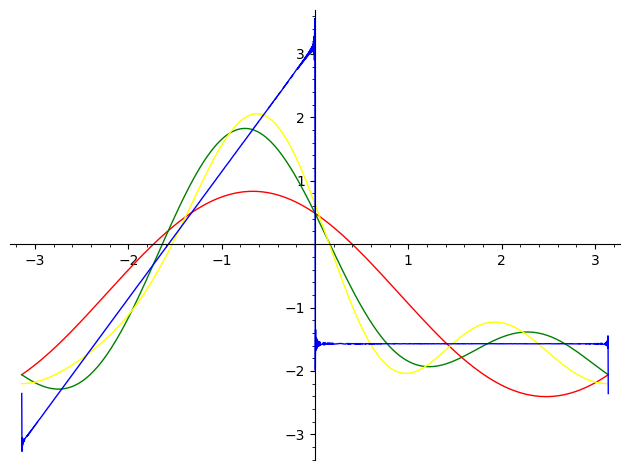

In [7]:
plots = plot(f.fourier_series_partial_sum(1), (x, -pi, pi), color='red')
plots += plot(f.fourier_series_partial_sum(2), (x, -pi, pi), color='green')
plots += plot(f.fourier_series_partial_sum(3), (x, -pi, pi), color='yellow')
plots += plot(f.fourier_series_partial_sum(1000), (x, -pi, pi))
plots

Можно сделать вывод, что чем больше итераций включено в частичную сумму, тем ближе ее график к графику $ S(x) $

Построим графики частичных сумм $ S_{1}(x), S_{3}(x), S_{10}(x) $ и $ S(x) $ на промежутке $ [-3\pi, 3\pi] $

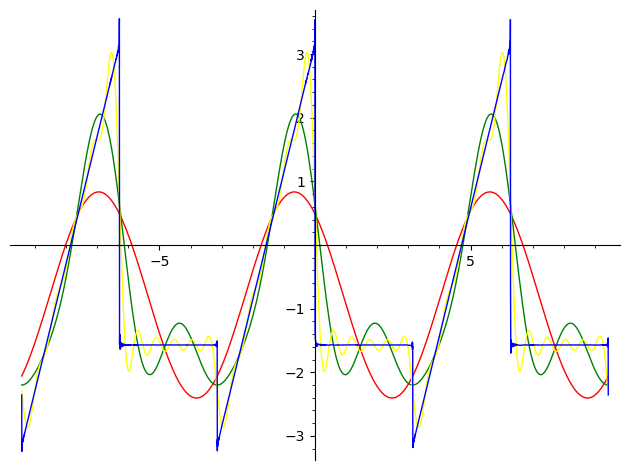

In [8]:
plots = plot(f.fourier_series_partial_sum(1), (x, -3 * pi, 3 * pi), color='red')
plots += plot(f.fourier_series_partial_sum(3), (x, -3 * pi, 3 * pi), color='green')
plots += plot(f.fourier_series_partial_sum(10), (x, -3 * pi, 3 * pi), color='yellow')
plots += plot(f.fourier_series_partial_sum(1000), (x, -3 * pi, 3 * pi))
plots

Здесь можно наблюдать переодичность функции. По условию она задана на периоде $ [-\pi, \pi] $, соответственно на $ [-3\pi, 3\pi] $ видно три ее периода.

Построим анимированные графики

In [9]:
Nmax = 15

frames = []
for N in range(1, Nmax+1):
    S_N = f.fourier_series_partial_sum(N)
    p = plot(S_N, (x, -pi, pi), color="red", ymin=-pi, ymax=pi, legend_label=f"S_{N}(x)")
    p += plot(f, (x, -pi, pi), color="blue", linestyle="--", legend_label="f(x)")
    p += text(f"N = {N}", (0.5, 2.5))
    frames.append(p)

A = animate(frames)
A.show()

Animation with 15 frames

## **Задание 2.** Разложите в ряд Фурье периодическую функцию $ y = f(x) $, заданную на промежутке $ (0, x_{1}) $ формулой $ y = ax + b $, а на $ [x_{1}, x_{2}] $ ‒ $ y = c $.

Воспользуйтесь созданной ранее процедурой (задание 1).

Постройте в одной системе координат график заданной функции $ f(x) $, графики частичных сумм $ S_{1}(x), S_{2}(x), S_{3}(x) $ ряда и его суммы $ S(x) $ на промежутке $ [0, x_{2}] $.

Постройте график суммы ряда $ S(x) $ на промежутке $ [-2x_{2}, 2x_{2}] $. Сравните полученные чертежи.

Анимируйте процесс построения графиков сумм ряда, взяв в качестве параметра порядковый номер частичной суммы.

In [10]:
a = 2
b = 2
c = -2
x_1 = 3
x_2 = 5

x = var('x')
f = piecewise([((0, x_1), a * x + b), ([x_1, x_2], c)], var=x)
show(f)

piecewise(x|-->2*x + 2 on (0, 3), x|-->-2 on [3, 5]; x)

Построим графики частичных сумм $ S_{1}(x), S_{2}(x), S_{3}(x) $ и $ S(x) $ на промежутке $ [0, x_{2}] $

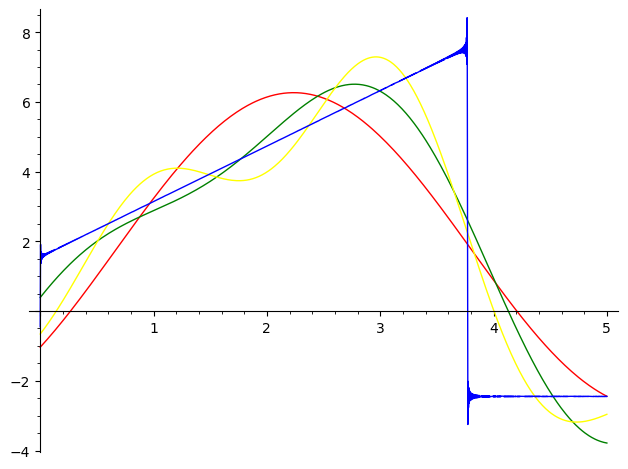

In [11]:
plots = plot(fourier_series(f, x, 1, [0, x_2]), (x, 0, x_2), color='red')
plots += plot(fourier_series(f, x, 2, [0, x_2]), (x, 0, x_2), color='green')
plots += plot(fourier_series(f, x, 3, [0, x_2]), (x, 0, x_2), color='yellow')
plots += plot(fourier_series(f, x, 1000, [0, x_2]), (x, 0, x_2))
plots

Теперь построим график суммы ряда на промежутке нескольких периодов.

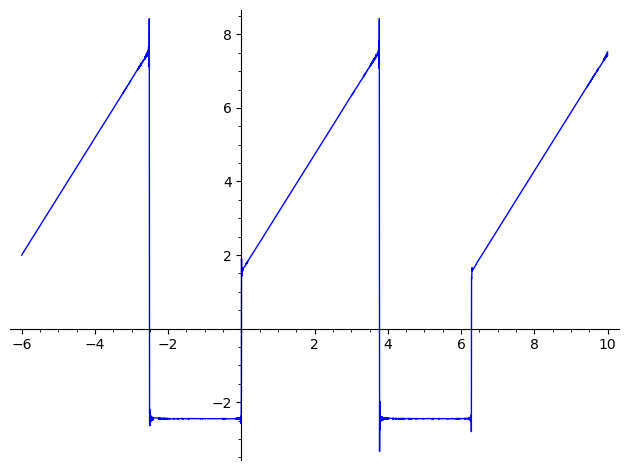

In [12]:
plot(fourier_series(f, x, 1000, [0, x_2]), (x, -2 * x_1, 2 * x_2))

Построим анимированные графики

In [13]:
Nmax = 15

frames = []
for N in range(1, Nmax+1):
    S_N = fourier_series(f, x, N, [0, x_2])
    p = plot(S_N, (x, 0, x_2), color="red", ymin=-pi, ymax=pi, legend_label=f"S_{N}(x)")
    p += plot(f, (x, 0, x_2), color="blue", linestyle="--", legend_label="f(x)")
    p += text(f"N = {N}", (0.5, 2.5))
    frames.append(p)

A = animate(frames)
A.show()

Animation with 15 frames

## **Задание 3.** Для графически заданной на промежутке функции как комбинации квадратичной и линейной постройте три разложения в тригонометрический ряд Фурье

Считая, что функция определена:
- на полном периоде,
- на полупериоде (является четной),
- на полупериоде (является нечетной).

Постройте для каждого ряда график его суммы на промежутках, превышающих длину заданного в 3-5 раз. Сравните с графиками порождающих их функций.

In [14]:
x_1 = 2
x_2 = 4

x = var('x')
f = piecewise([(RealSet.closed_open(0, x_1), 2*(x-1)^2), ([x_1, x_2], 4 - x)], var=x)
show(f)

piecewise(x|-->2*(x - 1)^2 on [0, 2), x|-->-x + 4 on [2, 4]; x)

Проверим правильность составленной функции

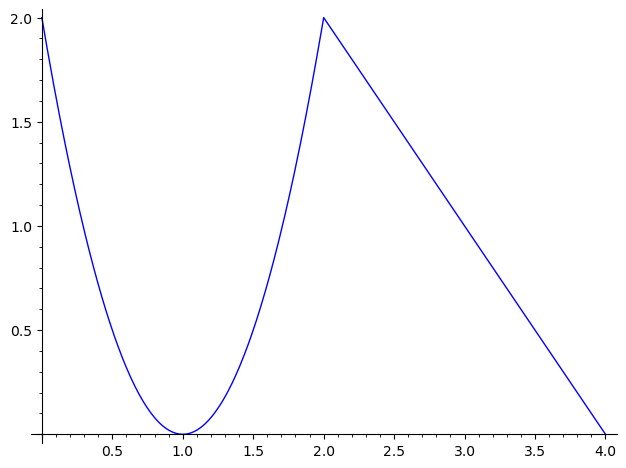

In [15]:
plot(f, (x, 0, x_2))

Построим график, считая, что функция определена на полном периоде, четном полупериоде (при $ b_{n} = 0 $) и нечетном полупериоде (при $ a_{n} = 0 $)

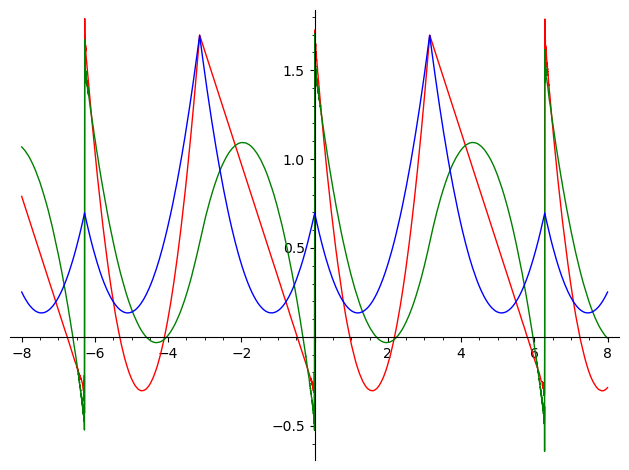

In [16]:
plots = plot(fourier_series(f, x, 1000, [0, x_2]), (x, -x_2 * 2, x_2 * 2), color='red')
plots += plot(fourier_series(f, x, 1000, [0, x_2], an=0), (x, 0 - x_2 * 2, x_2 * 2), color='green')
plots += plot(fourier_series(f, x, 1000, [0, x_2], bn=0), (x, 0 - x_2 * 2, x_2 * 2), color='blue')
plots

## **Задание 4.** Разложите функцию по многочленам Чебышёва и Лежандра. 

Создайте пользовательские процедуры, осуществляющие построение частичной суммы ряда Фурье абсолютно интегрируемой функции по этим ортогональным полиномам.

Для каждой функции на промежутке $ [-1, 1] $ постройте в одной системе координат ее график и график построенной частичной суммы ряда Фурье. Экс- периментально найдите наименьший порядок частичной суммы, аппроксимирующей заданную функцию с точностью до 0,1. Проиллюстрируйте свой результат.

Сравните построенные разложения с разложением в ряд Маклорена и в тригонометрический ряд Фурье на промежутке $ [-1, 1] $.

In [28]:
x = var('x')
n = 4

f_1 = sin(3 * x) ** 3
f_2 = arccos(x) - 1

Для работы с многочленом Чебышева первого рода (старший коэффициент $ 2^{n-1} $) в SageMath используется функция `chebyshev_T`. В качестве аргументов передается степень многочлена $ n $ и сама функция.

In [29]:
show(chebyshev_T(n, f_1))

8*sin(3*x)^12 - 8*sin(3*x)^6 + 1

Для работы с многочленом Чебышева второго рода (старший коэффициент $ 2^{n} $) в SageMath используется функция `chebyshev_U`. В качестве аргументов передается степень многочлена $ n $ и сама функция.

In [30]:
show(chebyshev_U(n, f_1))

16*sin(3*x)^12 - 12*sin(3*x)^6 + 1

Для многочлена Лежандра есть функция `gen_legendre_P`. Аргументами там являются порядок $ m $, степень $ n $ и сама функция.

In [31]:
for n in range(n+1):                                                        
     for m in range(n+Integer(1)):
         print(f"P_{n}^{m}({x}) = {gen_legendre_P(n, m, f_1)}")

P_0^0(x) = 1
P_1^0(x) = sin(3*x)^3
P_1^1(x) = -sqrt(-sin(3*x)^6 + 1)
P_2^0(x) = 3/2*sin(3*x)^6 - 1/2
P_2^1(x) = -3*sqrt(-sin(3*x)^6 + 1)*sin(3*x)^3
P_2^2(x) = -3*sin(3*x)^6 + 3
P_3^0(x) = 5/2*sin(3*x)^9 - 3/2*sin(3*x)^3
P_3^1(x) = -3/2*(5*sin(3*x)^6 - 1)*sqrt(-sin(3*x)^6 + 1)
P_3^2(x) = -15*(sin(3*x)^6 - 1)*sin(3*x)^3
P_3^3(x) = -15*(-sin(3*x)^6 + 1)^(3/2)
P_4^0(x) = 35/8*sin(3*x)^12 - 15/4*sin(3*x)^6 + 3/8
P_4^1(x) = -5/2*(7*sin(3*x)^9 - 3*sin(3*x)^3)*sqrt(-sin(3*x)^6 + 1)
P_4^2(x) = -15/2*(7*sin(3*x)^6 - 1)*(sin(3*x)^6 - 1)
P_4^3(x) = -105*(-sin(3*x)^6 + 1)^(3/2)*sin(3*x)^3
P_4^4(x) = 105*(sin(3*x)^6 - 1)^2


Возьмем $ n $ и $ m $ равными 2.

In [32]:
n = 2
m = 2
x_1 = -1
x_2 = 1

f_1_chebyshev = piecewise([([-1, 1], chebyshev_T(n, f_1))], var=x)
show(f_1_chebyshev)
f_1_legendre = piecewise([([-1, 1], gen_legendre_P(n, m, f_1))], var=x)
show(f_1_legendre)

f_2_chebyshev = piecewise([([-1, 1], chebyshev_T(n, f_2))], var=x)
show(f_2_chebyshev)
f_2_legendre = piecewise([([-1, 1], gen_legendre_P(n, m, f_2))], var=x)
show(f_2_legendre)

piecewise(x|-->2*sin(3*x)^6 - 1 on [-1, 1]; x)

piecewise(x|-->-3*sin(3*x)^6 + 3 on [-1, 1]; x)

piecewise(x|-->2*(arccos(x) - 1)^2 - 1 on [-1, 1]; x)

piecewise(x|-->-3*(arccos(x) - 1)^2 + 3 on [-1, 1]; x)

Получим частичные суммы ряда Фурье для всех этих многочленов.

In [58]:
f_1_chebyshev_fourier = fourier_series(f_1_chebyshev, x, 10, [x_1, x_2])
show(f_1_chebyshev_fourier)
f_1_legendre_fourier = fourier_series(f_1_legendre, x, 10, [x_1, x_2])
show(f_1_legendre_fourier)

f_2_chebyshev_fourier = fourier_series(f_2_chebyshev, x, 10, [x_1, x_2])
show(f_2_chebyshev_fourier)
f_2_legendre_fourier = fourier_series(f_2_legendre, x, 10, [x_1, x_2])
show(f_2_legendre_fourier)

9/16*((625*pi^4 - 1125*pi^2 + 324)*sin(18) - 4*(625*pi^4 - 2250*pi^2 + 729)*sin(12) + 5*(625*pi^4 - 2925*pi^2 + 2916)*sin(6))*cos(10*x)/(15625*pi^6 - 78750*pi^4 + 99225*pi^2 - 26244) - 1/36*((81*pi^4 - 180*pi^2 + 64)*sin(18) - 36*(9*pi^4 - 40*pi^2 + 16)*sin(12) + 45*(9*pi^4 - 52*pi^2 + 64)*sin(6))*cos(9*x)/(81*pi^6 - 504*pi^4 + 784*pi^2 - 256) + 9/16*((64*pi^4 - 180*pi^2 + 81)*sin(18) - (256*pi^4 - 1440*pi^2 + 729)*sin(12) + 5*(64*pi^4 - 468*pi^2 + 729)*sin(6))*cos(8*x)/(1024*pi^6 - 8064*pi^4 + 15876*pi^2 - 6561) - 9/4*((2401*pi^4 - 8820*pi^2 + 5184)*sin(18) - 4*(2401*pi^4 - 17640*pi^2 + 11664)*sin(12) + 5*(2401*pi^4 - 22932*pi^2 + 46656)*sin(6))*cos(7*x)/(117649*pi^6 - 1210104*pi^4 + 3111696*pi^2 - 1679616) + 1/16*((pi^4 - 5*pi^2 + 4)*sin(18) - 4*(pi^4 - 10*pi^2 + 9)*sin(12) + 5*(pi^4 - 13*pi^2 + 36)*sin(6))*cos(6*x)/(pi^6 - 14*pi^4 + 49*pi^2 - 36) - 9/4*((625*pi^4 - 4500*pi^2 + 5184)*sin(18) - 4*(625*pi^4 - 9000*pi^2 + 11664)*sin(12) + 5*(625*pi^4 - 11700*pi^2 + 46656)*sin(6))*cos(5*x)/(15625*pi^6 - 315000*pi^4 + 1587600*pi^2 - 1679616) + 9/16*((4*pi^4 - 45*pi^2 + 81)*sin(18) - (16*pi^4 - 360*pi^2 + 729)*sin(12) + 5*(4*pi^4 - 117*pi^2 + 729)*sin(6))*cos(4*x)/(16*pi^6 - 504*pi^4 + 3969*pi^2 - 6561) - 1/4*((pi^4 - 20*pi^2 + 64)*sin(18) - 4*(pi^4 - 40*pi^2 + 144)*sin(12) + 5*(pi^4 - 52*pi^2 + 576)*sin(6))*cos(3*x)/(pi^6 - 56*pi^4 + 784*pi^2 - 2304) + 9/16*((pi^4 - 45*pi^2 + 324)*sin(18) - 4*(pi^4 - 90*pi^2 + 729)*sin(12) + 5*(pi^4 - 117*pi^2 + 2916)*sin(6))*cos(2*x)/(pi^6 - 126*pi^4 + 3969*pi^2 - 26244) - 9/4*((pi^4 - 180*pi^2 + 5184)*sin(18) - 4*(pi^4 - 360*pi^2 + 11664)*sin(12) + 5*(pi^4 - 468*pi^2 + 46656)*sin(6))*cos(x)/(pi^6 - 504*pi^4 + 63504*pi^2 - 1679616) - 1/72*(8*cos(3)*sin(3)^5 + 10*cos(3)*sin(3)^3 + 15*cos(3)*sin(3) + 27)/pi

-27/32*((625*pi^4 - 1125*pi^2 + 324)*sin(18) - 4*(625*pi^4 - 2250*pi^2 + 729)*sin(12) + 5*(625*pi^4 - 2925*pi^2 + 2916)*sin(6))*cos(10*x)/(15625*pi^6 - 78750*pi^4 + 99225*pi^2 - 26244) + 1/24*((81*pi^4 - 180*pi^2 + 64)*sin(18) - 36*(9*pi^4 - 40*pi^2 + 16)*sin(12) + 45*(9*pi^4 - 52*pi^2 + 64)*sin(6))*cos(9*x)/(81*pi^6 - 504*pi^4 + 784*pi^2 - 256) - 27/32*((64*pi^4 - 180*pi^2 + 81)*sin(18) - (256*pi^4 - 1440*pi^2 + 729)*sin(12) + 5*(64*pi^4 - 468*pi^2 + 729)*sin(6))*cos(8*x)/(1024*pi^6 - 8064*pi^4 + 15876*pi^2 - 6561) + 27/8*((2401*pi^4 - 8820*pi^2 + 5184)*sin(18) - 4*(2401*pi^4 - 17640*pi^2 + 11664)*sin(12) + 5*(2401*pi^4 - 22932*pi^2 + 46656)*sin(6))*cos(7*x)/(117649*pi^6 - 1210104*pi^4 + 3111696*pi^2 - 1679616) - 3/32*((pi^4 - 5*pi^2 + 4)*sin(18) - 4*(pi^4 - 10*pi^2 + 9)*sin(12) + 5*(pi^4 - 13*pi^2 + 36)*sin(6))*cos(6*x)/(pi^6 - 14*pi^4 + 49*pi^2 - 36) + 27/8*((625*pi^4 - 4500*pi^2 + 5184)*sin(18) - 4*(625*pi^4 - 9000*pi^2 + 11664)*sin(12) + 5*(625*pi^4 - 11700*pi^2 + 46656)*sin(6))*cos(5*x)/(15625*pi^6 - 315000*pi^4 + 1587600*pi^2 - 1679616) - 27/32*((4*pi^4 - 45*pi^2 + 81)*sin(18) - (16*pi^4 - 360*pi^2 + 729)*sin(12) + 5*(4*pi^4 - 117*pi^2 + 729)*sin(6))*cos(4*x)/(16*pi^6 - 504*pi^4 + 3969*pi^2 - 6561) + 3/8*((pi^4 - 20*pi^2 + 64)*sin(18) - 4*(pi^4 - 40*pi^2 + 144)*sin(12) + 5*(pi^4 - 52*pi^2 + 576)*sin(6))*cos(3*x)/(pi^6 - 56*pi^4 + 784*pi^2 - 2304) - 27/32*((pi^4 - 45*pi^2 + 324)*sin(18) - 4*(pi^4 - 90*pi^2 + 729)*sin(12) + 5*(pi^4 - 117*pi^2 + 2916)*sin(6))*cos(2*x)/(pi^6 - 126*pi^4 + 3969*pi^2 - 26244) + 27/8*((pi^4 - 180*pi^2 + 5184)*sin(18) - 4*(pi^4 - 360*pi^2 + 11664)*sin(12) + 5*(pi^4 - 468*pi^2 + 46656)*sin(6))*cos(x)/(pi^6 - 504*pi^4 + 63504*pi^2 - 1679616) + 1/48*(8*cos(3)*sin(3)^5 + 10*cos(3)*sin(3)^3 + 15*cos(3)*sin(3) + 99)/pi

cos(10*x)*integrate(512*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^10 - 1280*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^8 + 1120*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^6 - 400*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^4 + 50*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 - 2*arccos(x)^2 + 4*arccos(x) - 1, x, -1, 1) + cos(9*x)*integrate(256*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^9 - 576*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^7 + 432*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^5 - 120*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 + 9*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x), x, -1, 1) + cos(8*x)*integrate(128*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^8 - 256*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^6 + 160*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^4 - 32*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 + 2*arccos(x)^2 - 4*arccos(x) + 1, x, -1, 1) + cos(7*x)*integrate(64*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^7 - 112*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^5 + 56*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 - 7*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x), x, -1, 1) + cos(6*x)*integrate(32*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^6 - 48*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^4 + 18*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 - 2*arccos(x)^2 + 4*arccos(x) - 1, x, -1, 1) + cos(5*x)*integrate(16*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^5 - 20*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 + 5*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x), x, -1, 1) + cos(4*x)*integrate(8*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^4 - 8*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 + 2*arccos(x)^2 - 4*arccos(x) + 1, x, -1, 1) + cos(3*x)*integrate(4*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 - 3*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x), x, -1, 1) + cos(2*x)*integrate(2*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 - 2*arccos(x)^2 + 4*arccos(x) - 1, x, -1, 1) + cos(x)*integrate((2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x), x, -1, 1) + integrate(2*(256*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^9 - 512*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^7 + 336*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^5 - 80*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 + 5*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x))*sin(pi*x), x, -1, 1)*sin(10*x) + integrate((256*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^8 - 448*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^6 + 240*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^4 - 40*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 + 2*arccos(x)^2 - 4*arccos(x) + 1)*sin(pi*x), x, -1, 1)*sin(9*x) + integrate(8*(16*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^7 - 24*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^5 + 10*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 - (2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x))*sin(pi*x), x, -1, 1)*sin(8*x) + integrate((64*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^6 - 80*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^4 + 24*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 - 2*arccos(x)^2 + 4*arccos(x) - 1)*sin(pi*x), x, -1, 1)*sin(7*x) + integrate(2*(16*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^5 - 16*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 + 3*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x))*sin(pi*x), x, -1, 1)*sin(6*x) + integrate((16*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^4 - 12*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 + 2*arccos(x)^2 - 4*arccos(x) + 1)*sin(pi*x), x, -1, 1)*sin(5*x) + integrate(4*(2*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^3 - (2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x))*sin(pi*x), x, -1, 1)*sin(4*x) + integrate((4*(2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)^2 - 2*arccos(x)^2 + 4*arccos(x) - 1)*sin(pi*x), x, -1, 1)*sin(3*x) + 2*integrate((2*arccos(x)^2 - 4*arccos(x) + 1)*cos(pi*x)*sin(pi*x), x, -1, 1)*sin(2*x) + integrate((2*arccos(x)^2 - 4*arccos(x) + 1)*sin(pi*x), x, -1, 1)*sin(x) - (2*pi - pi^2 + 3)/pi

-3*(integrate(-512*arccos(x)^2*sin(pi*x)^10 + 1280*arccos(x)^2*sin(pi*x)^8 - 1120*arccos(x)^2*sin(pi*x)^6 + 400*arccos(x)^2*sin(pi*x)^4 - 50*arccos(x)^2*sin(pi*x)^2 + arccos(x)^2, x, -1, 1) - 2*integrate(-512*arccos(x)*sin(pi*x)^10 + 1280*arccos(x)*sin(pi*x)^8 - 1120*arccos(x)*sin(pi*x)^6 + 400*arccos(x)*sin(pi*x)^4 - 50*arccos(x)*sin(pi*x)^2 + arccos(x), x, -1, 1))*cos(10*x) - 3*(integrate(256*arccos(x)^2*cos(pi*x)*sin(pi*x)^8 - 448*arccos(x)^2*cos(pi*x)*sin(pi*x)^6 + 240*arccos(x)^2*cos(pi*x)*sin(pi*x)^4 - 40*arccos(x)^2*cos(pi*x)*sin(pi*x)^2 + arccos(x)^2*cos(pi*x), x, -1, 1) - 2*integrate(256*arccos(x)*cos(pi*x)*sin(pi*x)^8 - 448*arccos(x)*cos(pi*x)*sin(pi*x)^6 + 240*arccos(x)*cos(pi*x)*sin(pi*x)^4 - 40*arccos(x)*cos(pi*x)*sin(pi*x)^2 + arccos(x)*cos(pi*x), x, -1, 1))*cos(9*x) - 3*(integrate(128*arccos(x)^2*sin(pi*x)^8 - 256*arccos(x)^2*sin(pi*x)^6 + 160*arccos(x)^2*sin(pi*x)^4 - 32*arccos(x)^2*sin(pi*x)^2 + arccos(x)^2, x, -1, 1) - 2*integrate(128*arccos(x)*sin(pi*x)^8 - 256*arccos(x)*sin(pi*x)^6 + 160*arccos(x)*sin(pi*x)^4 - 32*arccos(x)*sin(pi*x)^2 + arccos(x), x, -1, 1))*cos(8*x) - 3*(integrate(-64*arccos(x)^2*cos(pi*x)*sin(pi*x)^6 + 80*arccos(x)^2*cos(pi*x)*sin(pi*x)^4 - 24*arccos(x)^2*cos(pi*x)*sin(pi*x)^2 + arccos(x)^2*cos(pi*x), x, -1, 1) - 2*integrate(-64*arccos(x)*cos(pi*x)*sin(pi*x)^6 + 80*arccos(x)*cos(pi*x)*sin(pi*x)^4 - 24*arccos(x)*cos(pi*x)*sin(pi*x)^2 + arccos(x)*cos(pi*x), x, -1, 1))*cos(7*x) - 3*(integrate(-32*arccos(x)^2*sin(pi*x)^6 + 48*arccos(x)^2*sin(pi*x)^4 - 18*arccos(x)^2*sin(pi*x)^2 + arccos(x)^2, x, -1, 1) - 2*integrate(-32*arccos(x)*sin(pi*x)^6 + 48*arccos(x)*sin(pi*x)^4 - 18*arccos(x)*sin(pi*x)^2 + arccos(x), x, -1, 1))*cos(6*x) - 3*(integrate(16*arccos(x)^2*cos(pi*x)*sin(pi*x)^4 - 12*arccos(x)^2*cos(pi*x)*sin(pi*x)^2 + arccos(x)^2*cos(pi*x), x, -1, 1) - 2*integrate(16*arccos(x)*cos(pi*x)*sin(pi*x)^4 - 12*arccos(x)*cos(pi*x)*sin(pi*x)^2 + arccos(x)*cos(pi*x), x, -1, 1))*cos(5*x) - 3*(integrate(8*arccos(x)^2*sin(pi*x)^4 - 8*arccos(x)^2*sin(pi*x)^2 + arccos(x)^2, x, -1, 1) - 2*integrate(8*arccos(x)*sin(pi*x)^4 - 8*arccos(x)*sin(pi*x)^2 + arccos(x), x, -1, 1))*cos(4*x) - 3*(integrate(-4*arccos(x)^2*cos(pi*x)*sin(pi*x)^2 + arccos(x)^2*cos(pi*x), x, -1, 1) - 2*integrate(-4*arccos(x)*cos(pi*x)*sin(pi*x)^2 + arccos(x)*cos(pi*x), x, -1, 1))*cos(3*x) - 3*(integrate(-2*arccos(x)^2*sin(pi*x)^2 + arccos(x)^2, x, -1, 1) - 2*integrate(-2*arccos(x)*sin(pi*x)^2 + arccos(x), x, -1, 1))*cos(2*x) - 3*(integrate(arccos(x)^2*cos(pi*x), x, -1, 1) - 2*integrate(arccos(x)*cos(pi*x), x, -1, 1))*cos(x) - 3*(integrate(2*(256*arccos(x)^2*cos(pi*x)^9 - 512*arccos(x)^2*cos(pi*x)^7 + 336*arccos(x)^2*cos(pi*x)^5 - 80*arccos(x)^2*cos(pi*x)^3 + 5*arccos(x)^2*cos(pi*x))*sin(pi*x), x, -1, 1) - 2*integrate(2*(256*arccos(x)*cos(pi*x)^9 - 512*arccos(x)*cos(pi*x)^7 + 336*arccos(x)*cos(pi*x)^5 - 80*arccos(x)*cos(pi*x)^3 + 5*arccos(x)*cos(pi*x))*sin(pi*x), x, -1, 1))*sin(10*x) - 3*(integrate((256*arccos(x)^2*cos(pi*x)^8 - 448*arccos(x)^2*cos(pi*x)^6 + 240*arccos(x)^2*cos(pi*x)^4 - 40*arccos(x)^2*cos(pi*x)^2 + arccos(x)^2)*sin(pi*x), x, -1, 1) - 2*integrate((256*arccos(x)*cos(pi*x)^8 - 448*arccos(x)*cos(pi*x)^6 + 240*arccos(x)*cos(pi*x)^4 - 40*arccos(x)*cos(pi*x)^2 + arccos(x))*sin(pi*x), x, -1, 1))*sin(9*x) - 3*(integrate(8*(16*arccos(x)^2*cos(pi*x)^7 - 24*arccos(x)^2*cos(pi*x)^5 + 10*arccos(x)^2*cos(pi*x)^3 - arccos(x)^2*cos(pi*x))*sin(pi*x), x, -1, 1) - 2*integrate(8*(16*arccos(x)*cos(pi*x)^7 - 24*arccos(x)*cos(pi*x)^5 + 10*arccos(x)*cos(pi*x)^3 - arccos(x)*cos(pi*x))*sin(pi*x), x, -1, 1))*sin(8*x) - 3*(integrate((64*arccos(x)^2*cos(pi*x)^6 - 80*arccos(x)^2*cos(pi*x)^4 + 24*arccos(x)^2*cos(pi*x)^2 - arccos(x)^2)*sin(pi*x), x, -1, 1) - 2*integrate((64*arccos(x)*cos(pi*x)^6 - 80*arccos(x)*cos(pi*x)^4 + 24*arccos(x)*cos(pi*x)^2 - arccos(x))*sin(pi*x), x, -1, 1))*sin(7*x) - 3*(integrate(2*(16*arccos(x)^2*cos(pi*x)^5 - 16*arccos(x)^2*cos(pi*x)^3 + 3*arccos(x)^2*cos(pi*x))*sin(pi*x), x, -1, 1) - 2*integrate(2*(16*arccos(x)*cos(pi*x)^5 - 1

Построим графики для первой функции

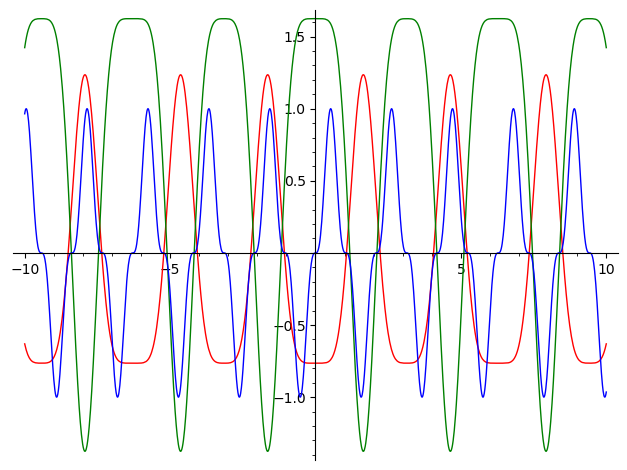

In [59]:
plots = plot(f_1_chebyshev_fourier, (x, -10, 10), color='red')
plots += plot(f_1_legendre_fourier, (x, -10, 10), color='green')
plots += plot(f_1, (x, -10, 10), color='blue')
plots

Построим графики для второй функции

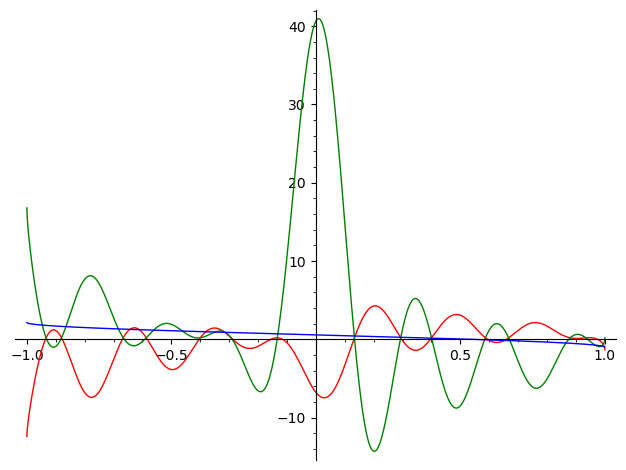

In [45]:
plots = plot(f_2_chebyshev_fourier, (x, -1, 1), color='red')
plots += plot(f_2_legendre_fourier, (x, -1, 1), color='green')
plots += plot(f_2, (x, -1, 1), color='blue')
plots

Найдем первый локальны минимум для частичную сумму для аппроксимации первой функции. Ряд Чебышева

In [78]:
chebyshev_optimal_f1 = 1
while True:
    f_1_chebyshev_fourier = fourier_series(f_1_chebyshev, x, chebyshev_optimal_f1, [x_1, x_2])
    fourier_num = f_1_chebyshev_fourier.subs(x=1)
    f_num = f_1.subs(x=1)
    if abs(round(fourier_num, 1) - round(f_num, 1)) <= 0.1:
        break
    chebyshev_optimal_f1 += 1
show(chebyshev_optimal_f1)

3

Ряд Лежандра

In [79]:
legendre_optimal_f1 = 1
while True:
    f_1_legendre_fourier = fourier_series(f_1_legendre, x, legendre_optimal_f1, [x_1, x_2])
    fourier_num = f_1_legendre_fourier.subs(x=1)
    f_num = f_1.subs(x=1)
    if abs(round(fourier_num, 1) - round(f_num, 1)) <= 0.1:
        break
    legendre_optimal_f1 += 1
show(legendre_optimal_f1)

2

Построим графики

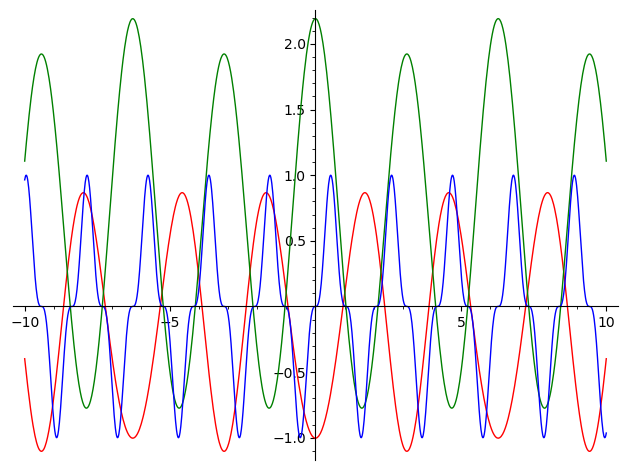

In [137]:
plots = plot(fourier_series(f_1_chebyshev, x, chebyshev_optimal_f1, [x_1, x_2]), (x, -10, 10), color='red')
plots += plot(fourier_series(f_1_legendre, x, legendre_optimal_f1, [x_1, x_2]), (x, -10, 10), color='green')
plots += plot(f_1, (x, -10, 10), color='blue')

plots

Добавим разложение в ряд Тейлора

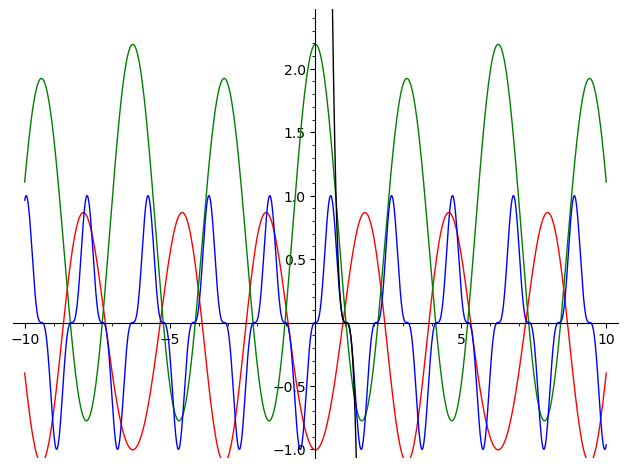

In [138]:
taylor_optimal_f1 = 3
while True:
    f_1_taylor = f_1.taylor(x, 1, taylor_optimal_f1)
    taylor_num = f_1_taylor.subs(x=1)
    f_num = f_1.subs(x=1)
    if abs(round(taylor_num, 1) - round(f_num, 1)) <= 0.01:
        break
    taylor_optimal_f1 += 1

plots += plot(f_1.taylor(x, 1, taylor_optimal_f1), (x, -10, 10),ymin=-1, ymax=2.4, color='black')
plots